# Нейросети для предсказания временных рядов

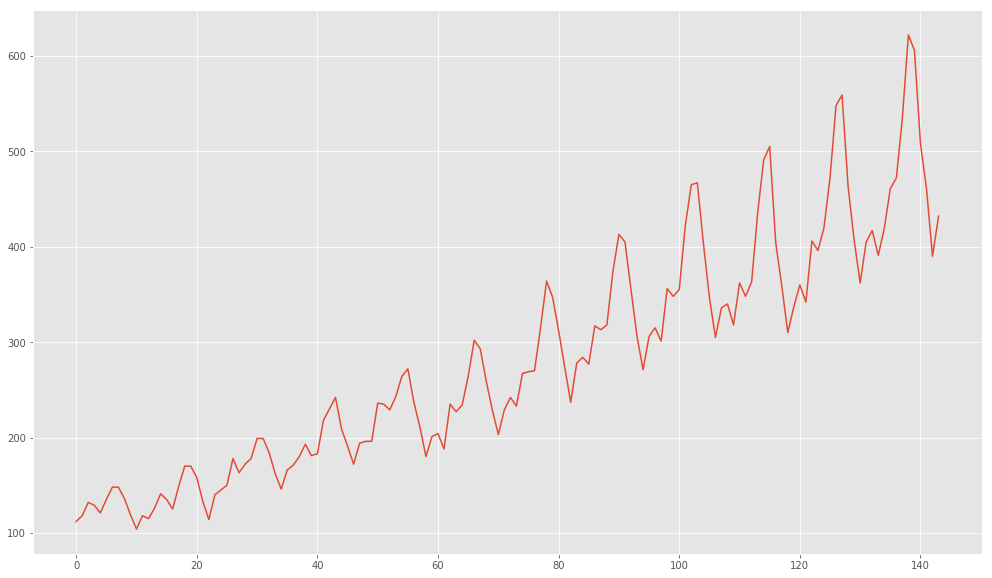

In [1]:
import pandas
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 17, 10 # задаём размер графика 

dataset = pandas.read_csv('https://github.com/lazyprogrammer/machine_learning_examples/raw/master/airline/international-airline-passengers.csv', 
                          usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [2]:
import os

import numpy
import matplotlib.pyplot as plt
import pandas
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset


# зафиксируем random_state для дальнейшей воспроизводимости эксперимента
numpy.random.seed(7)

dataset = dataset.values # Keras умеет хавать только numpy-матрицы
dataset = dataset.astype('float32')


# приведём все данные к интервалу значений от 0 до 1 (нормализуем)
# В принципе, если вы не используете регуляризацию, то можно не нормировать - результат будет тот же
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# разобьём данные на трейн и тест. 
# В задачах предсказания временный рядов это нужно делать осторожно, чтобы случайно не перемешать порядок данных!
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


# сконвертируем данные таким образом, чтобы для каждого временного тика (начиная с look_back) были добавлены 
# признаки для look_back предыдущих состояний
def create_dataset(dataset, look_back=1): # look_back - по какому количеству тиков времени мы собираемся предсказывать следующий
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0] # берём все тики времени от i до i + look_back не включая
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    dataX, dataY = numpy.array(dataX), numpy.array(dataY)
    dataX, dataY = dataX.reshape(dataX.shape[0], -1), dataY.reshape(dataY.shape[0], -1)
    
    return TensorDataset(torch.from_numpy(dataX), torch.from_numpy(dataY))

look_back = 2
n_features = look_back * 1
train_dataset = create_dataset(train, look_back)
test_dataset = create_dataset(test, look_back)

96 48


In [3]:
model = nn.Sequential(
    nn.Linear(n_features, 20),
    nn.Linear(20, 1)
)

criterion = nn.MSELoss()
opt = torch.optim.Adam(model.parameters())

N_EPOCHES = 1000
BATCH_SIZE = 10

for epoch in range(N_EPOCHES):
    print('Epoch: %d' % epoch)
    for x, y in DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True):
        y_pred = model(x)
        loss = criterion(y_pred, y)
        loss.backward()
        opt.step()
        opt.zero_grad()
    print('Loss (train): %f' % loss.item())

Epoch: 0
Loss (train): 0.003535
Epoch: 1
Loss (train): 0.002955
Epoch: 2
Loss (train): 0.001275
Epoch: 3
Loss (train): 0.011552
Epoch: 4
Loss (train): 0.008359
Epoch: 5
Loss (train): 0.000583
Epoch: 6
Loss (train): 0.003256
Epoch: 7
Loss (train): 0.007614
Epoch: 8
Loss (train): 0.001719
Epoch: 9
Loss (train): 0.001633
Epoch: 10
Loss (train): 0.002096
Epoch: 11
Loss (train): 0.009113
Epoch: 12
Loss (train): 0.000398
Epoch: 13
Loss (train): 0.005540
Epoch: 14
Loss (train): 0.000088
Epoch: 15
Loss (train): 0.003227
Epoch: 16
Loss (train): 0.001028
Epoch: 17
Loss (train): 0.002394
Epoch: 18
Loss (train): 0.006413
Epoch: 19
Loss (train): 0.002264
Epoch: 20
Loss (train): 0.003317
Epoch: 21
Loss (train): 0.001612
Epoch: 22
Loss (train): 0.002704
Epoch: 23
Loss (train): 0.000904
Epoch: 24
Loss (train): 0.003141
Epoch: 25
Loss (train): 0.000453
Epoch: 26
Loss (train): 0.001860
Epoch: 27
Loss (train): 0.002093
Epoch: 28
Loss (train): 0.004414
Epoch: 29
Loss (train): 0.000247
Epoch: 30
Loss (trai

Loss (train): 0.002099
Epoch: 260
Loss (train): 0.001154
Epoch: 261
Loss (train): 0.002191
Epoch: 262
Loss (train): 0.000586
Epoch: 263
Loss (train): 0.003687
Epoch: 264
Loss (train): 0.002384
Epoch: 265
Loss (train): 0.001680
Epoch: 266
Loss (train): 0.001823
Epoch: 267
Loss (train): 0.002357
Epoch: 268
Loss (train): 0.003082
Epoch: 269
Loss (train): 0.002922
Epoch: 270
Loss (train): 0.000939
Epoch: 271
Loss (train): 0.001682
Epoch: 272
Loss (train): 0.000422
Epoch: 273
Loss (train): 0.001436
Epoch: 274
Loss (train): 0.005542
Epoch: 275
Loss (train): 0.001843
Epoch: 276
Loss (train): 0.007768
Epoch: 277
Loss (train): 0.002543
Epoch: 278
Loss (train): 0.001531
Epoch: 279
Loss (train): 0.000534
Epoch: 280
Loss (train): 0.000363
Epoch: 281
Loss (train): 0.001412
Epoch: 282
Loss (train): 0.001278
Epoch: 283
Loss (train): 0.000084
Epoch: 284
Loss (train): 0.000176
Epoch: 285
Loss (train): 0.001607
Epoch: 286
Loss (train): 0.001315
Epoch: 287
Loss (train): 0.003616
Epoch: 288
Loss (train): 

Loss (train): 0.001014
Epoch: 512
Loss (train): 0.003007
Epoch: 513
Loss (train): 0.002979
Epoch: 514
Loss (train): 0.003493
Epoch: 515
Loss (train): 0.001436
Epoch: 516
Loss (train): 0.000420
Epoch: 517
Loss (train): 0.001717
Epoch: 518
Loss (train): 0.001765
Epoch: 519
Loss (train): 0.000979
Epoch: 520
Loss (train): 0.004444
Epoch: 521
Loss (train): 0.003102
Epoch: 522
Loss (train): 0.001836
Epoch: 523
Loss (train): 0.001039
Epoch: 524
Loss (train): 0.000270
Epoch: 525
Loss (train): 0.001214
Epoch: 526
Loss (train): 0.004630
Epoch: 527
Loss (train): 0.000759
Epoch: 528
Loss (train): 0.001588
Epoch: 529
Loss (train): 0.000986
Epoch: 530
Loss (train): 0.001391
Epoch: 531
Loss (train): 0.000985
Epoch: 532
Loss (train): 0.003465
Epoch: 533
Loss (train): 0.000630
Epoch: 534
Loss (train): 0.002553
Epoch: 535
Loss (train): 0.001746
Epoch: 536
Loss (train): 0.001877
Epoch: 537
Loss (train): 0.001375
Epoch: 538
Loss (train): 0.003977
Epoch: 539
Loss (train): 0.001491
Epoch: 540
Loss (train): 

Loss (train): 0.000606
Epoch: 786
Loss (train): 0.001446
Epoch: 787
Loss (train): 0.000887
Epoch: 788
Loss (train): 0.001413
Epoch: 789
Loss (train): 0.003684
Epoch: 790
Loss (train): 0.002531
Epoch: 791
Loss (train): 0.000741
Epoch: 792
Loss (train): 0.000478
Epoch: 793
Loss (train): 0.004735
Epoch: 794
Loss (train): 0.001993
Epoch: 795
Loss (train): 0.003886
Epoch: 796
Loss (train): 0.002102
Epoch: 797
Loss (train): 0.000330
Epoch: 798
Loss (train): 0.000569
Epoch: 799
Loss (train): 0.000762
Epoch: 800
Loss (train): 0.000733
Epoch: 801
Loss (train): 0.001925
Epoch: 802
Loss (train): 0.000829
Epoch: 803
Loss (train): 0.002035
Epoch: 804
Loss (train): 0.002341
Epoch: 805
Loss (train): 0.000584
Epoch: 806
Loss (train): 0.002657
Epoch: 807
Loss (train): 0.004818
Epoch: 808
Loss (train): 0.002035
Epoch: 809
Loss (train): 0.000656
Epoch: 810
Loss (train): 0.001362
Epoch: 811
Loss (train): 0.002258
Epoch: 812
Loss (train): 0.005037
Epoch: 813
Loss (train): 0.000790
Epoch: 814
Loss (train): 

In [4]:
# получим предсказания
with torch.no_grad():
    trainPredict = model(train_dataset.tensors[0])
    testPredict = model(test_dataset.tensors[0])
# преобразуем обратно наши данные из интервала (0, 1) в исходных диапазон значений
trainPredict = scaler.inverse_transform(trainPredict).squeeze()
trainY = scaler.inverse_transform(train_dataset.tensors[1]).squeeze()
testPredict = scaler.inverse_transform(testPredict).squeeze()
testY = scaler.inverse_transform(test_dataset.tensors[1]).squeeze()
# посчитаем MSE для наших предсказаний
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 21.68 RMSE
Test Score: 45.91 RMSE


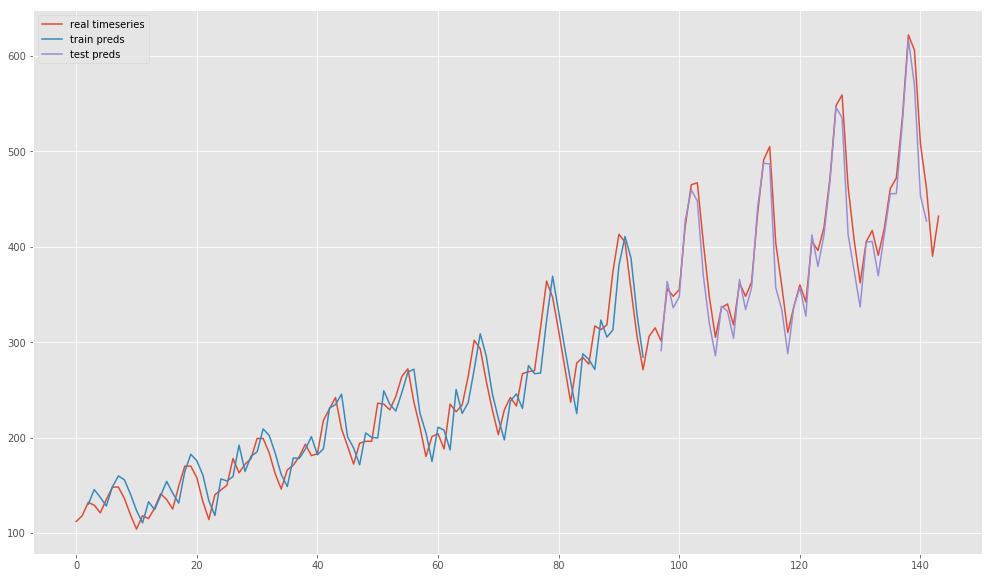

In [5]:
plt.figure(figsize=(17,10))

trainPredictPlot = numpy.empty_like(dataset).squeeze() # предсказания для train'a
trainPredictPlot[:] = numpy.nan # заполняем пустыми значениями
trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset).squeeze()
testPredictPlot[:] = numpy.nan
testPredictPlot[len(dataset)-look_back-len(testPredict):len(dataset)-look_back] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label='real timeseries')
plt.plot(trainPredictPlot, label='train preds')
plt.plot(testPredictPlot, label='test preds')
plt.legend()
plt.show()

# Рекуррентные нейросети

![](http://www.wildml.com/wp-content/uploads/2015/09/rnn.jpg)

![](http://s0.wp.com/latex.php?latex=%5Cbegin%7Baligned%7D++s_t+%26%3D+%5Ctanh%28Ux_t+%2B+Ws_%7Bt-1%7D%29+%5C%5C++o_t+%26%3D+%5Cmathrm%7Bsoftmax%7D%28Vs_t%29++%5Cend%7Baligned%7D++&bg=ffffff&fg=000&s=0)

![RNN](https://habrastorage.org/web/a9b/1e6/40f/a9b1e640f6264b0a902e851eb5f29e08.png)
![RNN full](https://habrastorage.org/web/5c8/0fa/c22/5c80fac224d449209d888d18ea1111a8.png)

# Попробуем запилить простую RNN для предсказания временных рядов

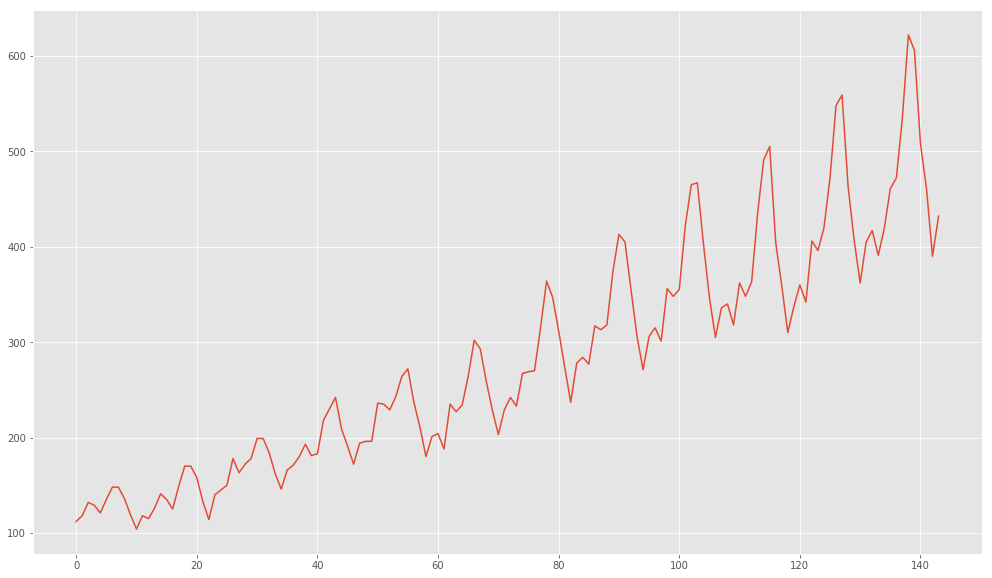

In [6]:
import pandas
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 17, 10 # задаём размер графика 

dataset = pandas.read_csv('https://github.com/lazyprogrammer/machine_learning_examples/raw/master/airline/international-airline-passengers.csv', 
                          usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [7]:
import os

import numpy
import matplotlib.pyplot as plt
import pandas
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset


# зафиксируем random_state для дальнейшей воспроизводимости эксперимента
numpy.random.seed(7)

dataset = dataset.values # Keras умеет хавать только numpy-матрицы
dataset = dataset.astype('float32')


# приведём все данные к интервалу значений от 0 до 1 (нормализуем)
# В принципе, если вы не используете регуляризацию, то можно не нормировать - результат будет тот же
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# разобьём данные на трейн и тест. 
# В задачах предсказания временный рядов это нужно делать осторожно, чтобы случайно не перемешать порядок данных!
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


# сконвертируем данные таким образом, чтобы для каждого временного тика (начиная с look_back) были добавлены 
# признаки для look_back предыдущих состояний
def create_dataset(dataset, look_back=1): # look_back - по какому количеству тиков времени мы собираемся предсказывать следующий
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0] # берём все тики времени от i до i + look_back не включая
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    dataX, dataY = numpy.array(dataX), numpy.array(dataY)

    dataX = numpy.expand_dims(dataX, -1) # рекуррентные слои pytorch принимают на вход данные в формате (длина последовательности (число тиков), размер батча, число фичей на тик)
    return TensorDataset(torch.from_numpy(dataX), torch.from_numpy(dataY))

look_back = 2
n_features = look_back * 1
train_dataset = create_dataset(train, look_back)
test_dataset = create_dataset(test, look_back)

96 48


In [8]:
class FlattenRNN(torch.nn.Module):
    def __init__(self):
        super(FlattenRNN, self).__init__()

    def forward(self, x):
        return x[0][:, -1, :]

model = nn.Sequential(
    nn.RNN(1, 10, batch_first=True),
    FlattenRNN(),
    nn.Linear(10, 1)
)

criterion = nn.MSELoss()
opt = torch.optim.Adam(model.parameters())

N_EPOCHES = 1000
BATCH_SIZE = 10

for epoch in range(N_EPOCHES):
    print('Epoch: %d' % epoch)
    for x, y in DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True):
        y_pred = model(x).squeeze()
        loss = criterion(y_pred, y.squeeze())
        loss.backward()
        opt.step()
        opt.zero_grad()
    print('Loss (train): %f' % loss.item())

Epoch: 0
Loss (train): 0.053020
Epoch: 1
Loss (train): 0.029842
Epoch: 2
Loss (train): 0.011693
Epoch: 3
Loss (train): 0.001669
Epoch: 4
Loss (train): 0.032284
Epoch: 5
Loss (train): 0.031874
Epoch: 6
Loss (train): 0.026294
Epoch: 7
Loss (train): 0.006098
Epoch: 8
Loss (train): 0.006610
Epoch: 9
Loss (train): 0.050588
Epoch: 10
Loss (train): 0.006156
Epoch: 11
Loss (train): 0.015202
Epoch: 12
Loss (train): 0.012032
Epoch: 13
Loss (train): 0.006434
Epoch: 14
Loss (train): 0.015235
Epoch: 15
Loss (train): 0.010589
Epoch: 16
Loss (train): 0.012978
Epoch: 17
Loss (train): 0.001524
Epoch: 18
Loss (train): 0.007345
Epoch: 19
Loss (train): 0.000456
Epoch: 20
Loss (train): 0.008837
Epoch: 21
Loss (train): 0.008557
Epoch: 22
Loss (train): 0.015412
Epoch: 23
Loss (train): 0.020309
Epoch: 24
Loss (train): 0.003991
Epoch: 25
Loss (train): 0.004853
Epoch: 26
Loss (train): 0.003242
Epoch: 27
Loss (train): 0.004265
Epoch: 28
Loss (train): 0.001880
Epoch: 29
Loss (train): 0.022132
Epoch: 30
Loss (trai

Loss (train): 0.001608
Epoch: 263
Loss (train): 0.005829
Epoch: 264
Loss (train): 0.000994
Epoch: 265
Loss (train): 0.002170
Epoch: 266
Loss (train): 0.000279
Epoch: 267
Loss (train): 0.001134
Epoch: 268
Loss (train): 0.003687
Epoch: 269
Loss (train): 0.001642
Epoch: 270
Loss (train): 0.001241
Epoch: 271
Loss (train): 0.000350
Epoch: 272
Loss (train): 0.001851
Epoch: 273
Loss (train): 0.000382
Epoch: 274
Loss (train): 0.000997
Epoch: 275
Loss (train): 0.000306
Epoch: 276
Loss (train): 0.005827
Epoch: 277
Loss (train): 0.003363
Epoch: 278
Loss (train): 0.000707
Epoch: 279
Loss (train): 0.000194
Epoch: 280
Loss (train): 0.000756
Epoch: 281
Loss (train): 0.003689
Epoch: 282
Loss (train): 0.000827
Epoch: 283
Loss (train): 0.000321
Epoch: 284
Loss (train): 0.000512
Epoch: 285
Loss (train): 0.004243
Epoch: 286
Loss (train): 0.002981
Epoch: 287
Loss (train): 0.000221
Epoch: 288
Loss (train): 0.001769
Epoch: 289
Loss (train): 0.001646
Epoch: 290
Loss (train): 0.002133
Epoch: 291
Loss (train): 

Loss (train): 0.002400
Epoch: 526
Loss (train): 0.001930
Epoch: 527
Loss (train): 0.000851
Epoch: 528
Loss (train): 0.001717
Epoch: 529
Loss (train): 0.001204
Epoch: 530
Loss (train): 0.001095
Epoch: 531
Loss (train): 0.000895
Epoch: 532
Loss (train): 0.001501
Epoch: 533
Loss (train): 0.003858
Epoch: 534
Loss (train): 0.000876
Epoch: 535
Loss (train): 0.001350
Epoch: 536
Loss (train): 0.007099
Epoch: 537
Loss (train): 0.000762
Epoch: 538
Loss (train): 0.000294
Epoch: 539
Loss (train): 0.003618
Epoch: 540
Loss (train): 0.001107
Epoch: 541
Loss (train): 0.000737
Epoch: 542
Loss (train): 0.001780
Epoch: 543
Loss (train): 0.000412
Epoch: 544
Loss (train): 0.000610
Epoch: 545
Loss (train): 0.002766
Epoch: 546
Loss (train): 0.000419
Epoch: 547
Loss (train): 0.001014
Epoch: 548
Loss (train): 0.003100
Epoch: 549
Loss (train): 0.001080
Epoch: 550
Loss (train): 0.003686
Epoch: 551
Loss (train): 0.001596
Epoch: 552
Loss (train): 0.000801
Epoch: 553
Loss (train): 0.002041
Epoch: 554
Loss (train): 

Loss (train): 0.001513
Epoch: 780
Loss (train): 0.000388
Epoch: 781
Loss (train): 0.000312
Epoch: 782
Loss (train): 0.001292
Epoch: 783
Loss (train): 0.001201
Epoch: 784
Loss (train): 0.001191
Epoch: 785
Loss (train): 0.000354
Epoch: 786
Loss (train): 0.000963
Epoch: 787
Loss (train): 0.000505
Epoch: 788
Loss (train): 0.000950
Epoch: 789
Loss (train): 0.003787
Epoch: 790
Loss (train): 0.003032
Epoch: 791
Loss (train): 0.003520
Epoch: 792
Loss (train): 0.001048
Epoch: 793
Loss (train): 0.005542
Epoch: 794
Loss (train): 0.001497
Epoch: 795
Loss (train): 0.001234
Epoch: 796
Loss (train): 0.001345
Epoch: 797
Loss (train): 0.004367
Epoch: 798
Loss (train): 0.000269
Epoch: 799
Loss (train): 0.001843
Epoch: 800
Loss (train): 0.000570
Epoch: 801
Loss (train): 0.001679
Epoch: 802
Loss (train): 0.001816
Epoch: 803
Loss (train): 0.003620
Epoch: 804
Loss (train): 0.000216
Epoch: 805
Loss (train): 0.001083
Epoch: 806
Loss (train): 0.000648
Epoch: 807
Loss (train): 0.002296
Epoch: 808
Loss (train): 

In [9]:
# получим предсказания
with torch.no_grad():
    trainPredict = model(train_dataset.tensors[0])
    testPredict = model(test_dataset.tensors[0])
# преобразуем обратно наши данные из интервала (0, 1) в исходных диапазон значений
trainPredict = scaler.inverse_transform(trainPredict).squeeze()
trainY = scaler.inverse_transform(train_dataset.tensors[1].unsqueeze(0)).squeeze()
testPredict = scaler.inverse_transform(testPredict).squeeze()
testY = scaler.inverse_transform(test_dataset.tensors[1].unsqueeze(0)).squeeze()
# посчитаем MSE для наших предсказаний
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 21.05 RMSE
Test Score: 56.74 RMSE


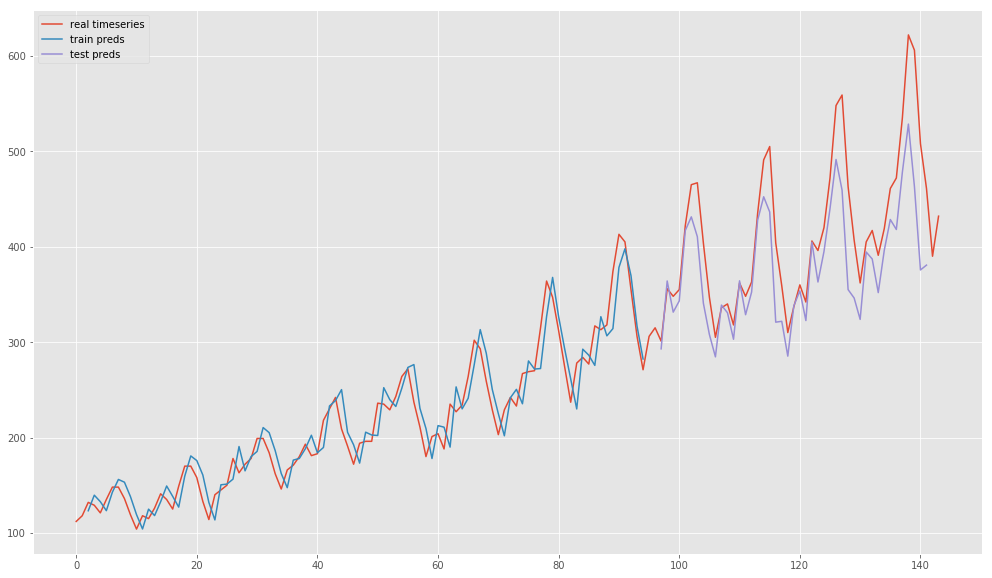

In [10]:
plt.figure(figsize=(17,10))

trainPredictPlot = numpy.empty_like(dataset).squeeze() # предсказания для train'a
trainPredictPlot[:] = numpy.nan # заполняем пустыми значениями
trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset).squeeze()
testPredictPlot[:] = numpy.nan
testPredictPlot[len(dataset)-look_back-len(testPredict):len(dataset)-look_back] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label='real timeseries')
plt.plot(trainPredictPlot, label='train preds')
plt.plot(testPredictPlot, label='test preds')
plt.legend()
plt.show()

## LSTM
![lstm](https://habrastorage.org/web/67b/04f/73b/67b04f73b4c34ba38edfa207e09de07c.png)

### Шаг 1
Определяем, что надо забыть из долгосрочной памяти

![](https://habrastorage.org/web/a5f/31a/104/a5f31a104b184217aca105de9ab6d320.png)

### Шаг 2
Определяем, какие элементы в долгосрочную память нужно добавить

![](https://habrastorage.org/web/248/bf4/a75/248bf4a75ab74bf180b9c0e2e2cc5a58.png)

### Шаг 3
Считаем эти элементы

![](https://habrastorage.org/web/30e/ffa/7f9/30effa7f98274deaa65cf2e293f18365.png)

### Шаг 4
Обновив долгосрочную память, определяем, что надо оставить в краткосрочной

![](https://habrastorage.org/web/16d/5b5/783/16d5b5783ba34244afcf0f240133fb28.png)

## Модификации

### Модификация 1

Учитывать долгосрочную память в остальных вычислениях

![](https://habrastorage.org/web/867/730/01d/86773001dcfe4fa5bb2a5e4959c00752.png)

### Модификация 2

Обновлять в долгосрочной памяти только те "ячейки", из которых на предыдущем шаге мы удаляли

![](https://habrastorage.org/web/832/da7/1b7/832da71b713b4664baac512f6efecefa.png)

### Модификация 3
GRU

![](https://cdn-images-1.medium.com/max/800/1*6eNTqLzQ08AABo-STFNiBw.png)

## Упражнение 2

In [11]:
class FlattenRNN(torch.nn.Module):
    def __init__(self):
        super(FlattenRNN, self).__init__()

    def forward(self, x):
        return x[0][:, -1, :]

model = nn.Sequential(
    nn.LSTM(1, 10, batch_first=True),
    FlattenRNN(),
    nn.Linear(10, 1)
)

criterion = nn.MSELoss()
opt = torch.optim.Adam(model.parameters())

N_EPOCHES = 1000
BATCH_SIZE = 10

for epoch in range(N_EPOCHES):
    print('Epoch: %d' % epoch)
    for x, y in DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True):
        y_pred = model(x).squeeze()
        loss = criterion(y_pred, y.squeeze())
        loss.backward()
        opt.step()
        opt.zero_grad()
    print('Loss (train): %f' % loss.item())

Epoch: 0
Loss (train): 0.077334
Epoch: 1
Loss (train): 0.031245
Epoch: 2
Loss (train): 0.014159
Epoch: 3
Loss (train): 0.008412
Epoch: 4
Loss (train): 0.009640
Epoch: 5
Loss (train): 0.011241
Epoch: 6
Loss (train): 0.004494
Epoch: 7
Loss (train): 0.047253
Epoch: 8
Loss (train): 0.021345
Epoch: 9
Loss (train): 0.004832
Epoch: 10
Loss (train): 0.007415
Epoch: 11
Loss (train): 0.009734
Epoch: 12
Loss (train): 0.006382
Epoch: 13
Loss (train): 0.024186
Epoch: 14
Loss (train): 0.025287
Epoch: 15
Loss (train): 0.002663
Epoch: 16
Loss (train): 0.011244
Epoch: 17
Loss (train): 0.035781
Epoch: 18
Loss (train): 0.027120
Epoch: 19
Loss (train): 0.006185
Epoch: 20
Loss (train): 0.009330
Epoch: 21
Loss (train): 0.007889
Epoch: 22
Loss (train): 0.005444
Epoch: 23
Loss (train): 0.012204
Epoch: 24
Loss (train): 0.007240
Epoch: 25
Loss (train): 0.004277
Epoch: 26
Loss (train): 0.018650
Epoch: 27
Loss (train): 0.011101
Epoch: 28
Loss (train): 0.001313
Epoch: 29
Loss (train): 0.006614
Epoch: 30
Loss (trai

Loss (train): 0.001615
Epoch: 263
Loss (train): 0.005095
Epoch: 264
Loss (train): 0.002525
Epoch: 265
Loss (train): 0.003604
Epoch: 266
Loss (train): 0.001752
Epoch: 267
Loss (train): 0.002628
Epoch: 268
Loss (train): 0.000210
Epoch: 269
Loss (train): 0.001045
Epoch: 270
Loss (train): 0.000857
Epoch: 271
Loss (train): 0.001073
Epoch: 272
Loss (train): 0.000802
Epoch: 273
Loss (train): 0.000462
Epoch: 274
Loss (train): 0.005832
Epoch: 275
Loss (train): 0.002974
Epoch: 276
Loss (train): 0.002702
Epoch: 277
Loss (train): 0.000197
Epoch: 278
Loss (train): 0.001532
Epoch: 279
Loss (train): 0.000648
Epoch: 280
Loss (train): 0.000907
Epoch: 281
Loss (train): 0.001842
Epoch: 282
Loss (train): 0.000466
Epoch: 283
Loss (train): 0.001941
Epoch: 284
Loss (train): 0.001497
Epoch: 285
Loss (train): 0.002006
Epoch: 286
Loss (train): 0.000440
Epoch: 287
Loss (train): 0.002182
Epoch: 288
Loss (train): 0.001125
Epoch: 289
Loss (train): 0.001766
Epoch: 290
Loss (train): 0.003472
Epoch: 291
Loss (train): 

Loss (train): 0.000529
Epoch: 519
Loss (train): 0.001714
Epoch: 520
Loss (train): 0.001439
Epoch: 521
Loss (train): 0.000482
Epoch: 522
Loss (train): 0.001014
Epoch: 523
Loss (train): 0.000124
Epoch: 524
Loss (train): 0.002374
Epoch: 525
Loss (train): 0.000270
Epoch: 526
Loss (train): 0.001976
Epoch: 527
Loss (train): 0.001705
Epoch: 528
Loss (train): 0.004134
Epoch: 529
Loss (train): 0.002300
Epoch: 530
Loss (train): 0.001459
Epoch: 531
Loss (train): 0.001211
Epoch: 532
Loss (train): 0.005694
Epoch: 533
Loss (train): 0.000212
Epoch: 534
Loss (train): 0.003350
Epoch: 535
Loss (train): 0.001419
Epoch: 536
Loss (train): 0.000944
Epoch: 537
Loss (train): 0.003040
Epoch: 538
Loss (train): 0.001583
Epoch: 539
Loss (train): 0.000547
Epoch: 540
Loss (train): 0.001790
Epoch: 541
Loss (train): 0.001172
Epoch: 542
Loss (train): 0.000659
Epoch: 543
Loss (train): 0.001337
Epoch: 544
Loss (train): 0.000138
Epoch: 545
Loss (train): 0.003640
Epoch: 546
Loss (train): 0.002341
Epoch: 547
Loss (train): 

Loss (train): 0.004224
Epoch: 762
Loss (train): 0.000631
Epoch: 763
Loss (train): 0.000708
Epoch: 764
Loss (train): 0.004577
Epoch: 765
Loss (train): 0.001726
Epoch: 766
Loss (train): 0.003034
Epoch: 767
Loss (train): 0.002469
Epoch: 768
Loss (train): 0.000609
Epoch: 769
Loss (train): 0.002325
Epoch: 770
Loss (train): 0.000258
Epoch: 771
Loss (train): 0.001485
Epoch: 772
Loss (train): 0.004282
Epoch: 773
Loss (train): 0.002762
Epoch: 774
Loss (train): 0.000328
Epoch: 775
Loss (train): 0.000567
Epoch: 776
Loss (train): 0.000654
Epoch: 777
Loss (train): 0.003107
Epoch: 778
Loss (train): 0.000754
Epoch: 779
Loss (train): 0.001904
Epoch: 780
Loss (train): 0.002405
Epoch: 781
Loss (train): 0.000129
Epoch: 782
Loss (train): 0.005648
Epoch: 783
Loss (train): 0.001025
Epoch: 784
Loss (train): 0.001175
Epoch: 785
Loss (train): 0.000835
Epoch: 786
Loss (train): 0.000280
Epoch: 787
Loss (train): 0.001400
Epoch: 788
Loss (train): 0.000396
Epoch: 789
Loss (train): 0.000368
Epoch: 790
Loss (train): 

In [12]:
# получим предсказания
with torch.no_grad():
    trainPredict = model(train_dataset.tensors[0])
    testPredict = model(test_dataset.tensors[0])
# преобразуем обратно наши данные из интервала (0, 1) в исходных диапазон значений
trainPredict = scaler.inverse_transform(trainPredict).squeeze()
trainY = scaler.inverse_transform(train_dataset.tensors[1].unsqueeze(0)).squeeze()
testPredict = scaler.inverse_transform(testPredict).squeeze()
testY = scaler.inverse_transform(test_dataset.tensors[1].unsqueeze(0)).squeeze()
# посчитаем MSE для наших предсказаний
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 20.51 RMSE
Test Score: 61.38 RMSE


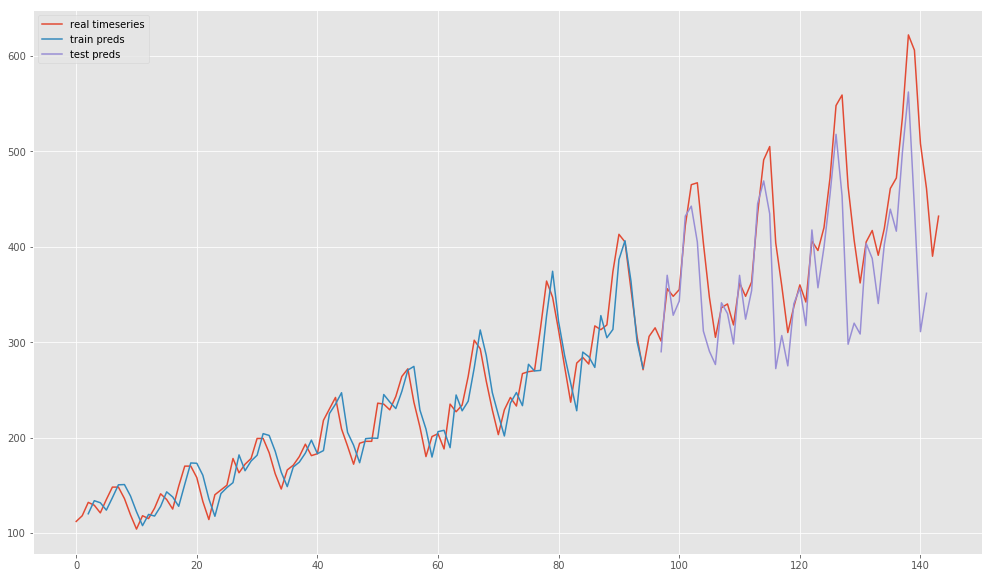

In [13]:
plt.figure(figsize=(17,10))

trainPredictPlot = numpy.empty_like(dataset).squeeze() # предсказания для train'a
trainPredictPlot[:] = numpy.nan # заполняем пустыми значениями
trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset).squeeze()
testPredictPlot[:] = numpy.nan
testPredictPlot[len(dataset)-look_back-len(testPredict):len(dataset)-look_back] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label='real timeseries')
plt.plot(trainPredictPlot, label='train preds')
plt.plot(testPredictPlot, label='test preds')
plt.legend()
plt.show()

# Полезные ссылки
* [Статья](https://habrahabr.ru/company/wunderfund/blog/331310/) про RNN и LSTM на Хабре
* [Статья](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/) с подробным разбором примера на Keras